In [2]:
import numpy as np
import pandas as pd
import os
from scipy.io import loadmat
from matplotlib import pyplot as plt
from glob import glob
from os import path

In [3]:
for dirname, _, filenames in os.walk('..\data\Kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\data\Kaggle\Farsiu_Ophthalmology_2013_AMD_Subject_1001.mat\Farsiu_Ophthalmology_2013_AMD_Subject_1001.mat
..\data\Kaggle\Farsiu_Ophthalmology_2013_AMD_Subject_1002.mat\Farsiu_Ophthalmology_2013_AMD_Subject_1002.mat
..\data\Kaggle\Farsiu_Ophthalmology_2013_AMD_Subject_1003.mat\Farsiu_Ophthalmology_2013_AMD_Subject_1003.mat
..\data\Kaggle\Farsiu_Ophthalmology_2013_AMD_Subject_1004.mat\Farsiu_Ophthalmology_2013_AMD_Subject_1004.mat
..\data\Kaggle\Farsiu_Ophthalmology_2013_AMD_Subject_1005.mat\Farsiu_Ophthalmology_2013_AMD_Subject_1005.mat
..\data\Kaggle\Farsiu_Ophthalmology_2013_AMD_Subject_1006.mat\Farsiu_Ophthalmology_2013_AMD_Subject_1006.mat
..\data\Kaggle\Farsiu_Ophthalmology_2013_AMD_Subject_1007.mat\Farsiu_Ophthalmology_2013_AMD_Subject_1007.mat
..\data\Kaggle\Farsiu_Ophthalmology_2013_AMD_Subject_1008.mat\Farsiu_Ophthalmology_2013_AMD_Subject_1008.mat
..\data\Kaggle\Farsiu_Ophthalmology_2013_AMD_Subject_1009.mat\Farsiu_Ophthalmology_2013_AMD_Subject_1009.mat
..\data\Kaggle\Fars

In [3]:
mat_fps = glob(path.join('..\data\Kaggle\Farsiu_Ophthalmology_2013_AMD_Subject_1008.mat\\', '*.mat'))

In [57]:
mat_dme = glob(path.join('..\data\Kaggle\\', 'Subject_01.mat'))

In [53]:
mat = loadmat(mat_fps[0])

In [58]:
mat = loadmat(mat_dme[0])

In [59]:
segmentation_classes = 8

In [61]:
#get the valid masks:
def get_valid_idx(layerMap):
    idx = []
    for i in range(0,61):
        temp = layerMap[:,:,i]
        if np.sum(temp) != 0:
            idx.append(i)
    return idx

In [74]:

layerMaps = np.array(mat['manualLayers2'], dtype=np.uint16)
img = np.array(mat['images'], dtype=np.uint8)
valid_idx = get_valid_idx(layerMaps)

layerMaps = layerMaps[:,:,valid_idx]

print(layerMaps.shape)

(8, 768, 11)


C:\Users\phili\AppData\Local\Temp\ipykernel_26640\1472225571.py:1: RuntimeWarning: invalid value encountered in cast
  layerMaps = np.array(mat['manualLayers2'], dtype=np.uint16)


In [76]:
def get_valid_img_seg(mat):
    layerMaps = np.array(mat['manualLayers2'], dtype=np.uint16)
    img = np.array(mat['images'], dtype=np.uint8)
    valid_idx = get_valid_idx(layerMaps)
    
    layerMaps = layerMaps[:, :, valid_idx]

    seg = np.zeros((496, 768, 11))
    max_col = -100
    min_col = 1100
    for idx in range(0, 11):
        for col in range(768):
            cur_col = layerMaps[:, col, idx]
            if np.sum(cur_col) == 0:
                continue

            max_col = max(max_col, col)
            min_col = min(min_col, col)

            labels_idx = cur_col.tolist()
            last_st = None
            last_ed = None
            for label, (st, ed) in enumerate(zip([0]+labels_idx, labels_idx+[-1])):
                
                #seg[st:ed, col, idx] = label
                if st == 0 and ed == 0:
                    st = last_ed
                    
                if ed == 0:
                    ed = st + 1

                if st == 0 and label != 0:
                    st = ed-1
                    st += 1

                seg[st:ed, col, idx] = label
                last_st = st
                last_ed = ed
            
    seg = seg[:, min_col:max_col+1]
    img = img[:, min_col:max_col+1]
    return img, seg

In [77]:
img, seg = get_valid_img_seg(mat)

C:\Users\phili\AppData\Local\Temp\ipykernel_26640\1721848835.py:2: RuntimeWarning: invalid value encountered in cast
  layerMaps = np.array(mat['manualLayers2'], dtype=np.uint16)


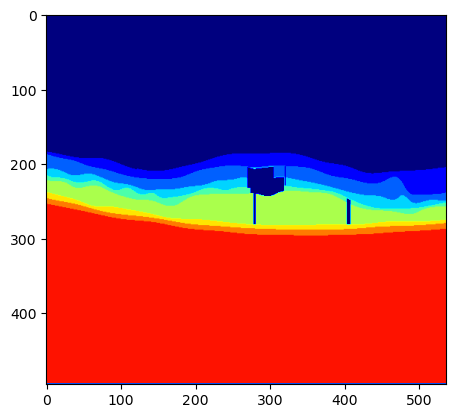

In [82]:
plt.imshow(seg[:, :, 1], cmap=plt.cm.jet, vmax=9)

In [43]:
np.where(seg[:, :, 0]==2)

(array([283, 284, 284, 284, 285, 285, 285, 285, 285, 286, 286, 286, 286,
        286, 286, 286, 286, 287, 287, 287, 287, 287, 287, 287, 287, 287,
        287, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
        289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289,
        289, 289, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290,
        290, 290, 290, 290, 290, 290, 291, 291, 291, 291, 291, 291, 291,
        291, 291, 291, 291, 291, 291, 291, 291, 291, 291, 292, 292, 292,
        292, 292, 292, 292, 292, 292, 292, 292, 292, 292, 292, 292, 292,
        292, 293, 293, 293, 293, 293, 293, 293, 293, 293, 293, 293, 293,
        293, 293, 293, 293, 293, 294, 294, 294, 294, 294, 294, 294, 294,
        294, 294, 294, 294, 294, 294, 294, 294, 294, 295, 295, 295, 295,
        295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295,
        296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 296,
        296, 296, 296, 296, 297, 297, 297, 297, 297